# Modelling the recovery process using probability

code from last time: $I_{n+1} = (1+c)I_n = λ * I_n$

In [8]:
function run_infection(I_0, λ, T=20)
    I = zeros(T)
    I[1] = I_0
    
    for n in 1:T-1
        I[n+1] = λ*I[n]
    end
    return I
end

run_infection (generic function with 2 methods)

In [5]:
run_infection(1.0, 0.1);

## Adding new data to extend a vector

In [6]:
v = [1.0]

1-element Array{Float64,1}:
 1.0

In [7]:
push!(v, 7.0)

2-element Array{Float64,1}:
 1.0
 7.0

In [12]:
function run_infection(I_0, λ, T=20)
    Is = [I_0] #vector of multiple Is
    
    I = I_0 #current value of I
    
    for n in 1:T-1
        I_next = λ*I
        push!(Is, I_next) #add new value of I into list of Is
    end
    return Is
end

run_infection (generic function with 2 methods)

In [13]:
run_infection(1.0, 1.1)

20-element Array{Float64,1}:
 1.0
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1

In [14]:
function run_infection(I_0, λ, T=20)
    Is = [I_0] #vector of multiple Is
    
    I = I_0 #current value of I
    
    for n in 1:T-1
        I_next = λ*I #new value
        push!(Is, I_next) #add new value of I into list of Is
        I = I_next #update current value to new value
    end
    return Is
end

run_infection (generic function with 2 methods)

In [15]:
run_infection(1.0, 1.1)

20-element Array{Float64,1}:
 1.0
 1.1
 1.2100000000000002
 1.3310000000000004
 1.4641000000000006
 1.6105100000000008
 1.771561000000001
 1.9487171000000014
 2.1435888100000016
 2.357947691000002
 2.5937424601000023
 2.853116706110003
 3.1384283767210035
 3.4522712143931042
 3.797498335832415
 4.177248169415656
 4.594972986357222
 5.054470284992944
 5.559917313492239
 6.115909044841463

## Randomness

In [16]:
r = rand()

0.8849706709188647

In [19]:
using Random
Random.seed!(3);
r = rand()

0.8116984049958615

In [20]:
Random.seed!(3); #get repeatable sequences of random numbers

In [21]:
r = rand()

0.8116984049958615

In [22]:
rand(10)

10-element Array{Float64,1}:
 0.9884323655013432
 0.8076220876500786
 0.9700908450487538
 0.14006111319509862
 0.5094438024440222
 0.05869740597593154
 0.004257960600515309
 0.9746379934512355
 0.5572251384524507
 0.4644219211852372

In [23]:
using Plots

In [26]:
r = rand(50)

50-element Array{Float64,1}:
 0.919348709012197
 0.21419187217745717
 0.8117673753262802
 0.2125692558465999
 0.9150689223930035
 0.7806593289875772
 0.03785733087898069
 0.17606566919102828
 0.30732615094988924
 0.4395094798962511
 0.35448616024001045
 0.4525307920827861
 0.3298461010660396
 ⋮
 0.5361750228438464
 0.5993909454958284
 0.9682165719286104
 0.9725451772483427
 0.21544365515867936
 0.17753946131786313
 0.6150927799003532
 0.9721611897817417
 0.6675188042505702
 0.1982592203665483
 0.28190010279434463
 0.03838092669114723

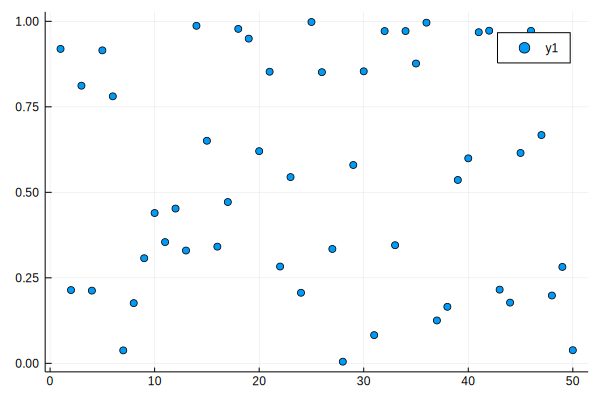

In [27]:
scatter(r)

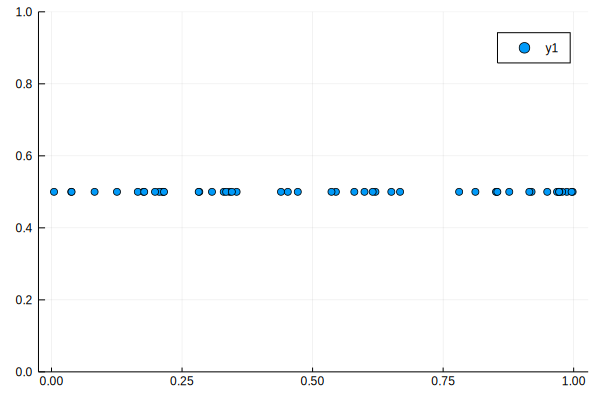

In [29]:
scatter(r, 0.5*one.(r), ylim = (0,1)) #r is x coord, one.(r) is y coord

In [32]:
using Interact

numPoints = 100 
r = rand(numPoints)

@manipulate for n in 1:numPoints
    scatter(r[1:n], 0.5*one.(r[1:n]), ylim = (0,1), xlim=(0, 1))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/all.js"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/style.css"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012da90010, Task (runnable) @0x000000012da90010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\

## Event with probability $p$

In [37]:
p = 0.25
r = rand()

if r < p
    true
else
    false
end

false

In [39]:
#bernoulli trial

function bernoulli(p)
    p = 0.25
    r = rand()

    if r < p
        return true
    else
        return false
    end
end

bernoulli (generic function with 1 method)

In [40]:
r < p ? true : false #ternary operator

false

In [41]:
r < p

false

In [42]:
function bernoulli(p)
    p = 0.25
    r = rand()

    return r< p
end

bernoulli (generic function with 1 method)

In [44]:
p =0.25
trials = [bernoulli(p) for i in 1:100]

100-element Array{Bool,1}:
 0
 0
 0
 0
 0
 0
 1
 0
 0
 1
 1
 0
 0
 ⋮
 1
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0

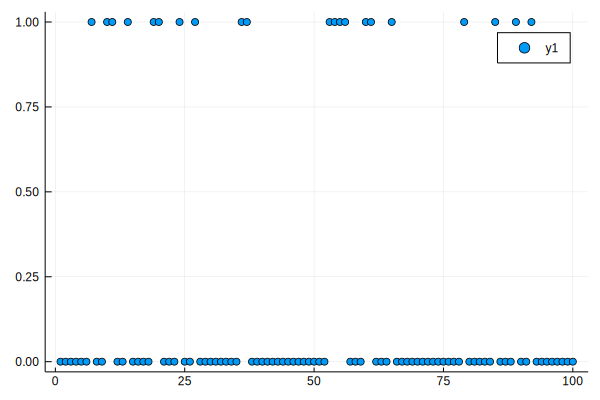

In [45]:
scatter(trials)

In [47]:
count(trials) #counts number of truths

21

In [48]:
trials = [bernoulli(p) for i in 1:100]
count(trials)

23

In [54]:
function bernoulli_experiment(p, N=100)
    trials = [bernoulli(p) for i in 1:N]
    return count(trials)
end

bernoulli_experiment (generic function with 2 methods)

In [50]:
count(trials .== false) #see how many are false

77

In [51]:
count(trials .== false) + count(trials)

100

In [52]:
count(.!(trials)) #also works the same as counting how many are false

77

In [55]:
bernoulli_experiment(0.25)

26

In [56]:
bernoulli_experiment(0.25)

25

A function which has different **outcomes** in different runs is called a **random variable**

## Monte Carlo simulation

Run the same random process lots of times and look at the results

In [59]:
p = 0.25
num_trials = 20
num_expts = 100

results = [bernoulli_experiment(p, num_trials) for i in 1:num_expts]

100-element Array{Int64,1}:
 4
 8
 5
 1
 3
 9
 4
 2
 4
 4
 2
 5
 7
 ⋮
 4
 6
 3
 9
 7
 9
 5
 7
 3
 4
 3
 7

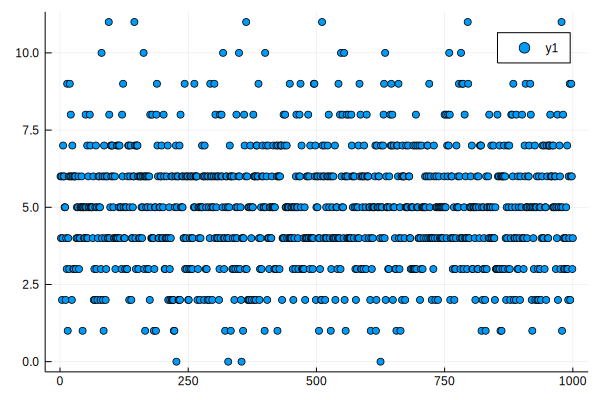

In [61]:
num_expts = 1000
results = [bernoulli_experiment(p, num_trials) for i in 1:num_expts]
scatter(results)

**Probability distribution** of a random variable $X$

$X$ = number of heads

$Pr[X=x]$

Probability that $X=x$ is the proportion of time that the result was $x$

## Counting

Need to count how many of the trials come out as 5 (.25 * 20)

Need data structure where we store the counts:
- Dict()
- Vector

In [62]:
results

1000-element Array{Int64,1}:
 6
 4
 6
 2
 4
 7
 6
 6
 5
 5
 2
 4
 3
 ⋮
 7
 3
 2
 6
 4
 9
 2
 6
 9
 6
 3
 4

In [63]:
maximum(results)

11

In [64]:
minimum(results)

0

In [65]:
l = maximum(results) + 1 # +1 because there is a 0 to store

12

In [67]:
counts = zeros(l)

12-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [68]:
for score in results[1:10]
    @show score
end

score = 6
score = 4
score = 6
score = 2
score = 4
score = 7
score = 6
score = 6
score = 5
score = 5


In [69]:
for score in results
    counts[score + 1] += 1 #increment current count for that result by 1
end

In [70]:
counts

12-element Array{Float64,1}:
   4.0
  26.0
  79.0
 118.0
 194.0
 203.0
 185.0
  98.0
  48.0
  28.0
  11.0
   6.0

In [71]:
counts = zeros(Int, maximum(results)+1)

for score in results
    counts[score + 1] += 1 #increment current count for that result by 1
end
counts

12-element Array{Int64,1}:
   4
  26
  79
 118
 194
 203
 185
  98
  48
  28
  11
   6

In [75]:
]add LaTeXStrings

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching:

    Fetching: [================>                        ]  

Fetching: [========================================>]  100.0 %          ]  70.4 % [====================================>    ]  89.4 %

  Resolving package versions...
  Installed libass_jll ─── v0.14.0+1
  Installed LaTeXStrings ─ v1.1.0
######################################################################### 100.0%##O#- #                                                                        
   Updating `~/.julia/environments/v1.4/Project.toml`
  [b964fa9f] + LaTeXStrings v1.1.0
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [b964fa9f] + LaTeXStrings v1.1.0
  [0ac62f75] ↑ libass_jll v0.14.0+0 ⇒ v0.14.0+1


## Frequency distribution

┌ Info: Precompiling LaTeXStrings [b964fa9f-0449-5b57-a5c2-d3ea65f4040f]
└ @ Base loading.jl:1260


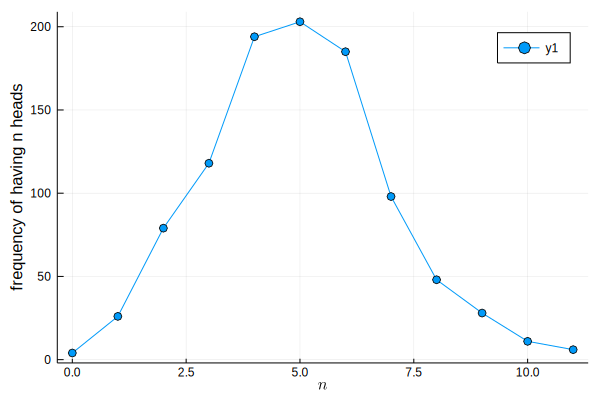

In [76]:
using LaTeXStrings

plot(0:maximum(results), counts, m=:o)
ylabel!("frequency of having n heads")
xlabel!(L"n")

In [77]:
function count_them(results)
    
    counts = zeros(Int, maximum(results)+1)

    for score in results
        counts[score + 1] += 1 #increment current count for that result by 1
    end
    return counts
end

count_them (generic function with 1 method)

In [78]:
function run_experiments(p, N, num_expts=1000)
    results = [bernoulli_experiment(p, num_trials) for i in 1:num_expts]
end

run_experiments (generic function with 2 methods)

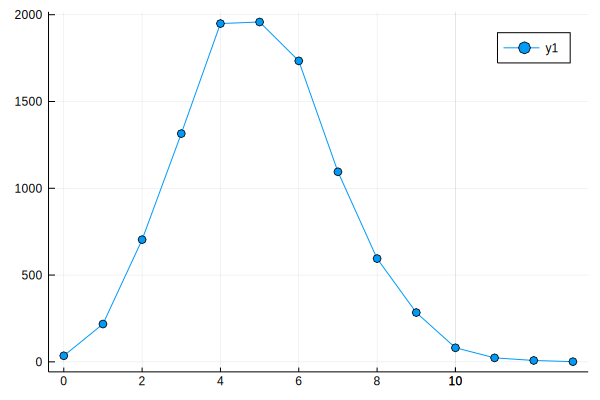

In [80]:
data = count_them(run_experiments(0.25, 20, 10000))
plot(0:length(data)-1, data, m=:o)

## Probability distribution

probability = relative frequency

Divide by the number of experiments:

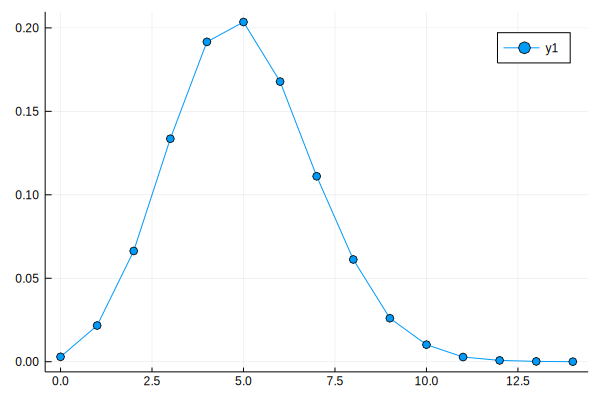

In [83]:
data = count_them(run_experiments(0.25, 20, 10^5))
plot(0:length(data)-1, data ./ sum(data), m=:o)

In [84]:
@time data = count_them(run_experiments(0.25, 20, 10^5))

  0.025921 seconds (200.00 k allocations: 12.970 MiB)


17-element Array{Int64,1}:
   309
  2068
  6676
 13575
 19160
 20254
 16940
 11010
  5996
  2618
   985
   301
    81
    20
     5
     1
     1

In [85]:
@time data = count_them(run_experiments(0.25, 20, 10^7))

  2.696928 seconds (20.00 M allocations: 1.267 GiB, 16.01% gc time)


18-element Array{Int64,1}:
   31759
  211370
  669908
 1339316
 1897722
 2021699
 1685831
 1124457
  609000
  270569
   98820
   30186
    7551
    1520
     250
      40
       1
       1

In [94]:
num_expts = 10^5
data = count_them(run_experiments(0.25, 20, num_expts))

probs = data ./ num_expts

15-element Array{Float64,1}:
 0.00358
 0.02099
 0.06631
 0.13453
 0.18907
 0.20435
 0.16852
 0.11216
 0.05988
 0.02721
 0.00968
 0.00276
 0.00075
 0.00013
 8.0e-5

In [95]:
sum(probs)

1.0

In [88]:
x = 3//4

3//4

In [89]:
typeof(x)

Rational{Int64}

In [90]:
x+x

3//2

In [91]:
probs = data .// num_expts

15-element Array{Rational{Int64},1}:
   331//100000
  1019//50000
  1323//20000
 13491//100000
  9531//50000
 20251//100000
  8503//50000
  1107//10000
   121//2000
  2683//100000
   501//50000
    79//25000
    71//100000
     3//25000
     1//50000

In [96]:
sum(probs)

1.0

In [97]:
using Statistics

In [100]:
results = run_experiments(0.25, 20, 10^5)
mean(results) #N = 20 trials, p=0.25

5.00488

Expected value = N * p